## Experimento para ver el efecto de una capa POOL 

In [1]:
import numpy as np
import pandas as pd
%matplotlib inline
import matplotlib as mpl
import matplotlib.pyplot as plt

In [2]:
import tensorflow as tf
from tensorflow import keras

## Dataset: Fashion Mnist

Link  https://keras.io/datasets/#fashion-mnist-database-of-fashion-articles

Dataset que consiste de 60,000 imágenes de entrenamiento en blanco y negro catalogadas en 10 categorías y un test set de 10,000 imágenes. Los labels/rótulos son:

| Label |	Description |
--- | --- |
| 0	| T-shirt/top
| 1	| Trouser
| 2	| Pullover 
| 3	| Dress
| 4	| Coat
| 5	| Sandal
| 6	| Shirt
| 7	| Sneaker
| 8	| Bag
| 9	| Ankle boot

### Para importar
from keras.datasets import fashion_mnist

> (x_train, y_train), (x_test, y_test) = fashion_mnist.load_data()

Retorna:
2 tuplas:
1. x_train, x_test: array de uint8 de imágenes blanco y negro de dimensiones (num_samples, 28, 28)
2. y_train, y_test: array de uint8 d rótulos (enteros en el rango range 0-9) con dimensiones (num_samples,).

In [3]:
fashion_mnist = keras.datasets.fashion_mnist
(X_train_full, y_train_full), (X_test, y_test) = fashion_mnist.load_data()

4423680/4422102 [==============================] - 0s 0us/step


In [4]:
class_names = ["T-shirt/top", "Trouser", "Pullover", "Dress", "Coat",
               "Sandal", "Shirt", "Sneaker", "Bag", "Ankle boot"]

### Redimensionamos los datos

In [5]:
X_train_full = X_train_full.reshape((60000, 28, 28, 1))
X_test = X_test.reshape((10000, 28, 28, 1))

### Normalización

In [6]:
X_train_n = X_train_full / 255.
X_test_n = X_test / 255.

### Dividimos los datos en datasets de entrenamiento/validación/test

In [7]:
X_valid, X_train = X_train_n[:5000], X_train_n[5000:]
y_valid, y_train = y_train_full[:5000], y_train_full[5000:]
X_test = X_test_n

### Arquitectura con Pooling vs sin Pooling

![image.png](attachment:image.png)

### Pooling vs No Pooling

In [8]:
model_a = keras.models.Sequential()
model_a.add(keras.layers.Conv2D(filters = 32, kernel_size = (3, 3), strides=1, padding='valid', activation='relu', input_shape=(28, 28, 1)))
model_a.add(keras.layers.MaxPooling2D((2, 2)))
model_a.add(keras.layers.Flatten())
model_a.add(keras.layers.Dense(300, activation="relu"))
model_a.add(keras.layers.Dense(100, activation="relu"))
model_a.add(keras.layers.Dense(10, activation="softmax"))

# el segundo modelo no tiene Max Pool, notar que strides = 2 en la capa convolucional para que los dos modelos tengan
# la misma cantidad de parámetros
model_b = keras.models.Sequential()
model_b.add(keras.layers.Conv2D(filters = 32, kernel_size = (3, 3), strides=2, padding='valid', activation='relu', input_shape=(28, 28, 1)))
model_b.add(keras.layers.Flatten())
model_b.add(keras.layers.Dense(300, activation="relu"))
model_b.add(keras.layers.Dense(100, activation="relu"))
model_b.add(keras.layers.Dense(10, activation="softmax"))


In [9]:
model_a.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 26, 26, 32)        320       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 13, 13, 32)        0         
_________________________________________________________________
flatten (Flatten)            (None, 5408)              0         
_________________________________________________________________
dense (Dense)                (None, 300)               1622700   
_________________________________________________________________
dense_1 (Dense)              (None, 100)               30100     
_________________________________________________________________
dense_2 (Dense)              (None, 10)                1010      
Total params: 1,654,130
Trainable params: 1,654,130
Non-trainable params: 0
______________________________________________

In [13]:
model_b.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 13, 13, 32)        320       
_________________________________________________________________
flatten_1 (Flatten)          (None, 5408)              0         
_________________________________________________________________
dense_3 (Dense)              (None, 300)               1622700   
_________________________________________________________________
dense_4 (Dense)              (None, 100)               30100     
_________________________________________________________________
dense_5 (Dense)              (None, 10)                1010      
Total params: 1,654,130
Trainable params: 1,654,130
Non-trainable params: 0
_________________________________________________________________


In [10]:
model_a.compile(loss="sparse_categorical_crossentropy",
              optimizer="sgd",
              metrics=["accuracy"])

model_b.compile(loss="sparse_categorical_crossentropy",
              optimizer="sgd",
              metrics=["accuracy"])

In [11]:
model_history_a = model_a.fit(X_train, y_train, epochs=10,batch_size= 64,
                    validation_data=(X_valid, y_valid))

Epoch 1/10
860/860 [==============================] - 3s 3ms/step - loss: 0.8555 - accuracy: 0.7039 - val_loss: 0.7662 - val_accuracy: 0.7242
Epoch 2/10
860/860 [==============================] - 2s 3ms/step - loss: 0.5281 - accuracy: 0.8073 - val_loss: 0.5063 - val_accuracy: 0.8194
Epoch 3/10
860/860 [==============================] - 2s 3ms/step - loss: 0.4702 - accuracy: 0.8311 - val_loss: 0.4507 - val_accuracy: 0.8454
Epoch 4/10
860/860 [==============================] - 2s 3ms/step - loss: 0.4359 - accuracy: 0.8433 - val_loss: 0.4524 - val_accuracy: 0.8336
Epoch 5/10
860/860 [==============================] - 2s 3ms/step - loss: 0.4088 - accuracy: 0.8529 - val_loss: 0.4076 - val_accuracy: 0.8584
Epoch 6/10
860/860 [==============================] - 2s 3ms/step - loss: 0.3869 - accuracy: 0.8610 - val_loss: 0.3979 - val_accuracy: 0.8614
Epoch 7/10
860/860 [==============================] - 2s 3ms/step - loss: 0.3678 - accuracy: 0.8686 - val_loss: 0.4106 - val_accuracy: 0.8466
Epoch 

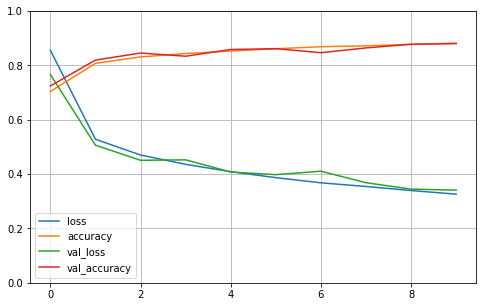

In [12]:
import pandas as pd

pd.DataFrame(model_history_a.history).plot(figsize=(8, 5))
plt.grid(True)
plt.gca().set_ylim(0, 1)
plt.show()

In [13]:
ev = model_a.evaluate(X_test_n, y_test)

313/313 [==============================] - 1s 2ms/step - loss: 0.3659 - accuracy: 0.8662


In [14]:
X_new = X_test[:3]

In [15]:
y_pred = model_a.predict_classes(X_new)
y_pred

Instructions for updating:
Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).


array([9, 2, 1])

In [16]:
y_test[:3]

array([9, 2, 1], dtype=uint8)

AxesImage(54,36;334.8x217.44)


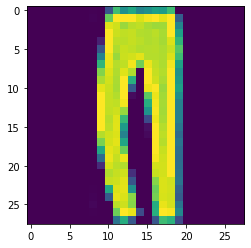

In [17]:
print(plt.imshow(X_test[2].reshape((28,28))))

In [25]:
model_history_b = model_b.fit(X_train, y_train, epochs=10,batch_size= 64,
                    validation_data=(X_valid, y_valid))

Epoch 1/10
860/860 [==============================] - 2s 3ms/step - loss: 0.3516 - accuracy: 0.8710 - val_loss: 0.5635 - val_accuracy: 0.7946
Epoch 2/10
860/860 [==============================] - 2s 3ms/step - loss: 0.3419 - accuracy: 0.8760 - val_loss: 0.3524 - val_accuracy: 0.8708
Epoch 3/10
860/860 [==============================] - 2s 3ms/step - loss: 0.3340 - accuracy: 0.8781 - val_loss: 0.3655 - val_accuracy: 0.8676
Epoch 4/10
860/860 [==============================] - 2s 3ms/step - loss: 0.3283 - accuracy: 0.8806 - val_loss: 0.3260 - val_accuracy: 0.8836
Epoch 5/10
860/860 [==============================] - 2s 3ms/step - loss: 0.3214 - accuracy: 0.8823 - val_loss: 0.3622 - val_accuracy: 0.8668
Epoch 6/10
860/860 [==============================] - 3s 3ms/step - loss: 0.3167 - accuracy: 0.8844 - val_loss: 0.3221 - val_accuracy: 0.8820
Epoch 7/10
860/860 [==============================] - 2s 3ms/step - loss: 0.3126 - accuracy: 0.8848 - val_loss: 0.3190 - val_accuracy: 0.8806
Epoch 

In [19]:
ev = model_b.evaluate(X_test_n, y_test)

313/313 [==============================] - 1s 2ms/step - loss: 0.4449 - accuracy: 0.8331


In [20]:
model_c = keras.models.Sequential()

model_c.add(keras.layers.Conv2D(filters = 32, kernel_size = (3, 3), strides=1, padding='same', activation='relu', input_shape=(28, 28, 1)))
model_c.add(keras.layers.MaxPooling2D((2, 2)))

model_c.add(keras.layers.Conv2D(filters = 32, kernel_size = (3, 3), strides=1, padding='same', activation='relu', input_shape=(14, 14, 32)))
model_c.add(keras.layers.MaxPooling2D((2, 2)))

model_c.add(keras.layers.Flatten())

model_c.add(keras.layers.Dense(300, activation="relu"))
model_c.add(keras.layers.Dense(100, activation="relu"))
model_c.add(keras.layers.Dense(10, activation="softmax"))

In [28]:
model_c.compile(optimizer=keras.optimizers.SGD(learning_rate=0.015),loss="sparse_categorical_crossentropy",
                metrics=['accuracy'])

In [48]:
model_history_c = model_c.fit(X_train, y_train, epochs=25,batch_size= 64,validation_data=(X_valid, y_valid))

Epoch 1/25
860/860 [==============================] - 3s 3ms/step - loss: 0.2834 - accuracy: 0.8959 - val_loss: 0.3026 - val_accuracy: 0.8994
Epoch 2/25
860/860 [==============================] - 3s 3ms/step - loss: 0.2761 - accuracy: 0.8987 - val_loss: 0.3031 - val_accuracy: 0.8936
Epoch 3/25
860/860 [==============================] - 3s 3ms/step - loss: 0.2672 - accuracy: 0.9009 - val_loss: 0.3124 - val_accuracy: 0.8832
Epoch 4/25
860/860 [==============================] - 3s 3ms/step - loss: 0.2601 - accuracy: 0.9053 - val_loss: 0.2788 - val_accuracy: 0.9036
Epoch 5/25
860/860 [==============================] - 3s 3ms/step - loss: 0.2545 - accuracy: 0.9059 - val_loss: 0.2968 - val_accuracy: 0.8956
Epoch 6/25
860/860 [==============================] - 3s 3ms/step - loss: 0.2466 - accuracy: 0.9103 - val_loss: 0.2767 - val_accuracy: 0.9020
Epoch 7/25
860/860 [==============================] - 3s 3ms/step - loss: 0.2408 - accuracy: 0.9113 - val_loss: 0.2694 - val_accuracy: 0.9036
Epoch 

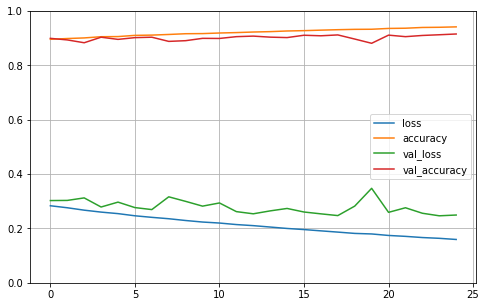

In [49]:

pd.DataFrame(model_history_c.history).plot(figsize=(8, 5))
plt.grid(True)
plt.gca().set_ylim(0, 1)
plt.show()

# Red overfitter

Red overfitter

Podemos ver como epoch a epoch la accuracy del train sigue subiendo de a poco, pero en validation se mantiene estable casi desde las primeras.

Inclusive, la gráfica del Loss para Validation muestra una tendencia creciente.

In [43]:
model_d = keras.models.Sequential()

model_d.add(keras.layers.Conv2D(filters = 32, kernel_size = (3, 3), strides=1, padding='same', activation='relu', input_shape=(28, 28, 1)))
model_d.add(keras.layers.MaxPooling2D((2, 2),padding='same'))

model_d.add(keras.layers.Conv2D(filters = 16, kernel_size = (5, 5), strides=1, padding='same', activation='relu', input_shape=(28, 28, 32)))
model_d.add(keras.layers.MaxPooling2D(pool_size=((2,2)),strides=1))

model_d.add(keras.layers.Flatten())

model_d.add(keras.layers.Dense(200, activation="relu"))
model_d.add(keras.layers.Dense(100, activation="relu"))
model_d.add(keras.layers.Dense(50, activation="relu"))

model_d.add(keras.layers.Dense(10, activation="softmax"))

In [44]:
model_d.compile(optimizer=keras.optimizers.SGD(learning_rate=0.03),loss="sparse_categorical_crossentropy",
                metrics=['accuracy'])

In [46]:
model_history_d = model_d.fit(X_train, y_train, epochs=50,batch_size= 256,validation_data=(X_valid, y_valid))

Epoch 1/50
215/215 [==============================] - 2s 8ms/step - loss: 0.1961 - accuracy: 0.9278 - val_loss: 0.2435 - val_accuracy: 0.9106
Epoch 2/50
215/215 [==============================] - 2s 7ms/step - loss: 0.1903 - accuracy: 0.9296 - val_loss: 0.2523 - val_accuracy: 0.9062
Epoch 3/50
215/215 [==============================] - 2s 7ms/step - loss: 0.1852 - accuracy: 0.9309 - val_loss: 0.2458 - val_accuracy: 0.9112
Epoch 4/50
215/215 [==============================] - 2s 7ms/step - loss: 0.1825 - accuracy: 0.9323 - val_loss: 0.2408 - val_accuracy: 0.9096
Epoch 5/50
215/215 [==============================] - 2s 7ms/step - loss: 0.1787 - accuracy: 0.9340 - val_loss: 0.2420 - val_accuracy: 0.9146
Epoch 6/50
215/215 [==============================] - 2s 7ms/step - loss: 0.1749 - accuracy: 0.9355 - val_loss: 0.2443 - val_accuracy: 0.9088
Epoch 7/50
215/215 [==============================] - 2s 7ms/step - loss: 0.1725 - accuracy: 0.9369 - val_loss: 0.2371 - val_accuracy: 0.9112
Epoch 

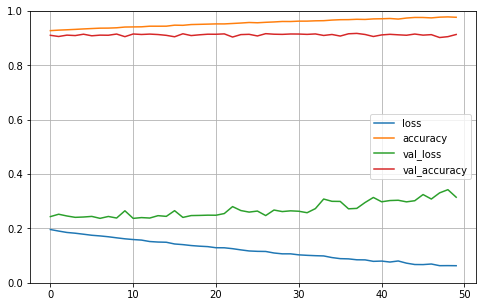

In [47]:

pd.DataFrame(model_history_d.history).plot(figsize=(8, 5))
plt.grid(True)
plt.gca().set_ylim(0, 1)
plt.show()